<a href="https://colab.research.google.com/github/ramulla/ORES-5160-01/blob/main/roshini_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('SDG-duration-of-school-closures-by-country.csv')

In [3]:
data.columns

Index(['Country', 'SDG Region', 'Days fully closed', 'Days partially closed',
       'Total'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                206 non-null    object
 1   SDG Region             206 non-null    object
 2   Days fully closed      206 non-null    int64 
 3   Days partially closed  206 non-null    int64 
 4   Total                  206 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 8.2+ KB


In [5]:
data.head

<bound method NDFrame.head of                               Country                        SDG Region  \
0                           Indonesia  Asia (Eastern and South-eastern)   
1    Bolivia (Plurinational State of)   Latin America and the Caribbean   
2                            Honduras   Latin America and the Caribbean   
3                         El Salvador   Latin America and the Caribbean   
4                               India       Asia (Central and Southern)   
..                                ...                               ...   
201                      Cook Islands                           Oceania   
202                         Greenland       Northern America and Europe   
203                          Kiribati                           Oceania   
204                  Marshall Islands                           Oceania   
205                              Niue                           Oceania   

     Days fully closed  Days partially closed  Total  
0             

In [6]:
data.describe()

,Days fully closed,Days partially closed,Total
count,206.000000,206.000000,206.000000
mean,141.543689,151.135922,292.679612
std,102.682297,123.329624,174.675041
min,0.000000,0.000000,10.000000
25%,71.500000,45.000000,151.250000
50%,120.000000,133.000000,261.000000
75%,189.500000,214.750000,432.750000
max,556.000000,539.000000,666.000000


In [7]:
# columns removing
drop_columns = ['Country', 'Days partially closed']
columns_to_drop = [col for col in data.columns if col in drop_columns]
data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [8]:
data.columns


Index(['SDG Region', 'Days fully closed', 'Total'], dtype='object')

In [9]:
# datatype conversion
def to_category(col):
    return col.astype('category')

def to_int16(col):
   return col.astype('int16')

data['SDG Region'] = to_category(data['SDG Region'])

data['Days fully closed'] = to_int16(data['Days fully closed'])
data['Total'] = to_int16(data['Total'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   SDG Region         206 non-null    category
 1   Days fully closed  206 non-null    int16   
 2   Total              206 non-null    int16   
dtypes: category(1), int16(2)
memory usage: 1.5 KB


In [11]:
#renaming columns
data.rename(columns={'Days fully closed': 'Days closed'}, inplace=True)


In [12]:
data.columns

Index(['SDG Region', 'Days closed', 'Total'], dtype='object')

In [13]:
#duplicates
duplicates = data[data.duplicated()]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   SDG Region   206 non-null    category
 1   Days closed  206 non-null    int16   
 2   Total        206 non-null    int16   
dtypes: category(1), int16(2)
memory usage: 1.5 KB


In [15]:
#checking for null values
null_counts = data.isna().sum()

In [16]:
#new field creation called as percentage closed
data['Percentage Closed'] = (data['Days closed'] / data['Total']) * 100



In [17]:
print(data.columns)


Index(['SDG Region', 'Days closed', 'Total', 'Percentage Closed'], dtype='object')


<Axes: >

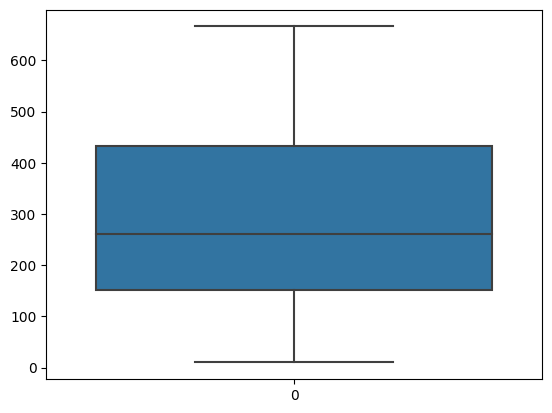

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data['Total'])


<Axes: >

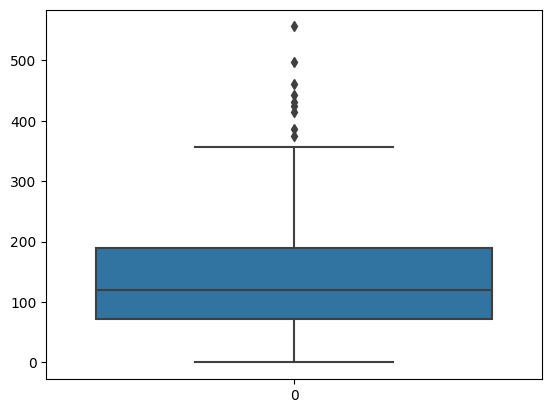

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data['Days closed'])

In [20]:
# z score method
limit_upper = data['Days closed'].mean() + 3*data['Days closed'].std()
limit_lower = data['Days closed'].mean() - 3*data['Days closed'].std()
print('upper limit:', limit_upper)
print('lower limit:', limit_lower)

upper limit: 449.5905812304338
lower limit: -166.50320258965712


In [21]:
#outliers identification
data.loc[(data['Days closed'] > limit_upper) | (data['Days closed'] < limit_lower)]

,SDG Region,Days closed,Total,Percentage Closed
2,Latin America and the Caribbean,498,655,76.030534
7,Africa (Sub-Saharan),460,622,73.954984
18,Asia (Eastern and South-eastern),556,562,98.932384


In [22]:
# trimming method
new_data = data.loc[(data['Days closed'] <= limit_upper) & (data['Days closed'] >= limit_lower)]
print('before removing outliers:', len(data))
print('after removing outliers:',len(new_data))
print('outliers:', len(data)-len(new_data))

before removing outliers: 206
after removing outliers: 203
outliers: 3


<Axes: >

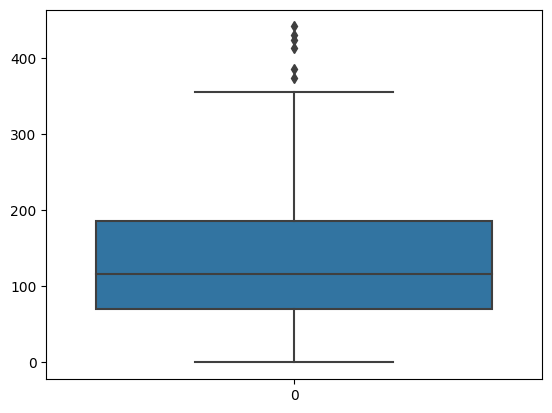

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(new_data['Days closed'])

In [31]:
Final_dataset= data

In [30]:
Final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   SDG Region         206 non-null    category
 1   Days closed        206 non-null    int16   
 2   Total              206 non-null    int16   
 3   Percentage Closed  206 non-null    float64 
dtypes: category(1), float64(1), int16(2)
memory usage: 3.1 KB


In [29]:
Final_dataset.to_csv('Final_dataset.csv', index=False)